In [3]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB

In [4]:
# Import csv and convert to pandas
# Import csv and convert to pandas
filename = 'COVID-19_Case_Surveillance_Public_Use_Data_with_Geography_20241125.csv'
df = pandas.read_csv(filename)

print(df.columns)

Index(['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race',
       'ethnicity', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn'],
      dtype='object')


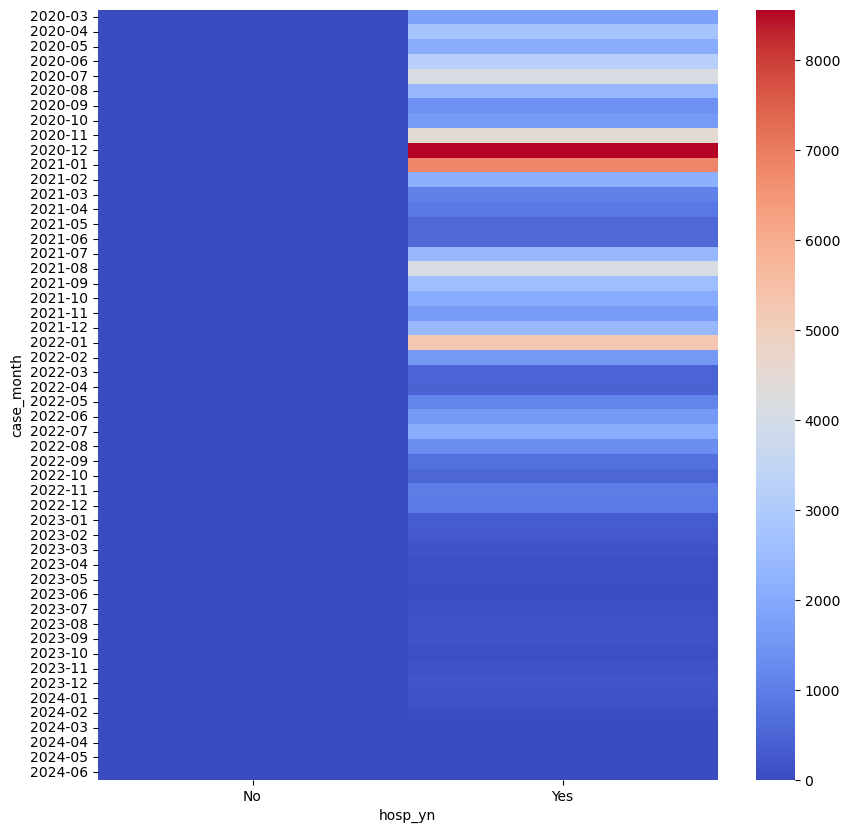

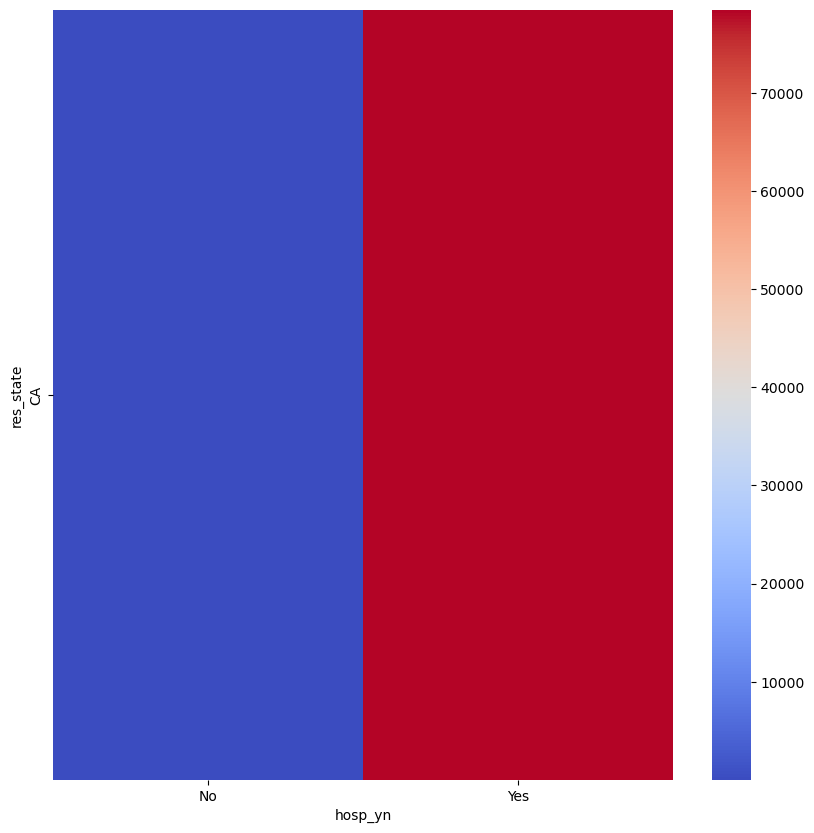

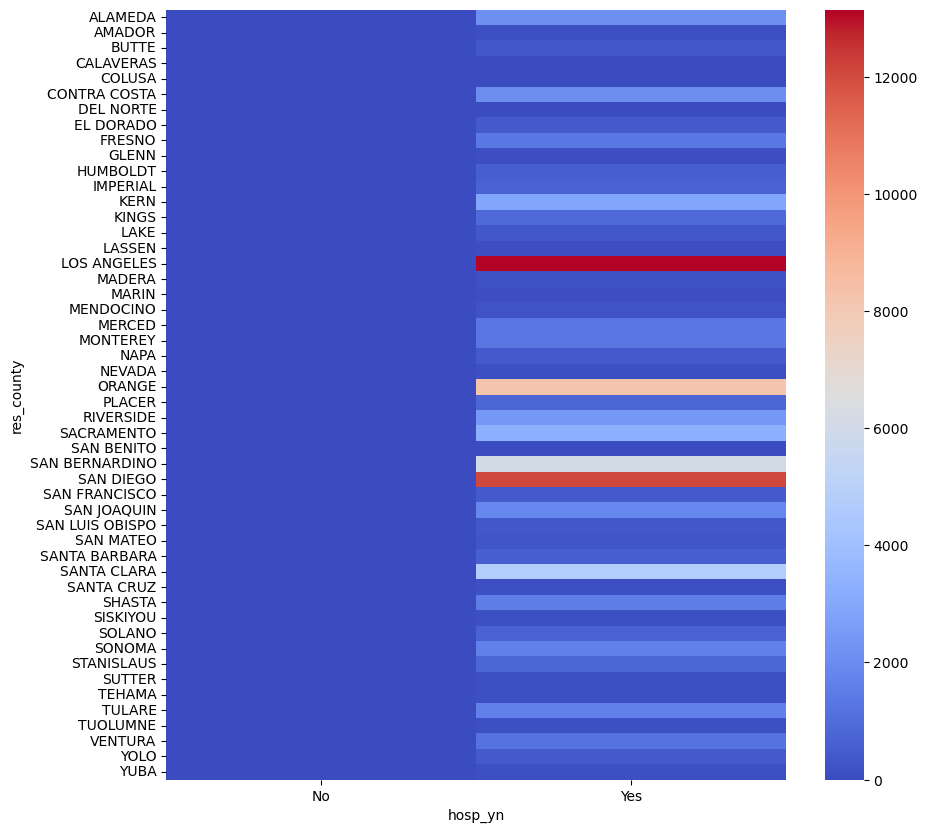

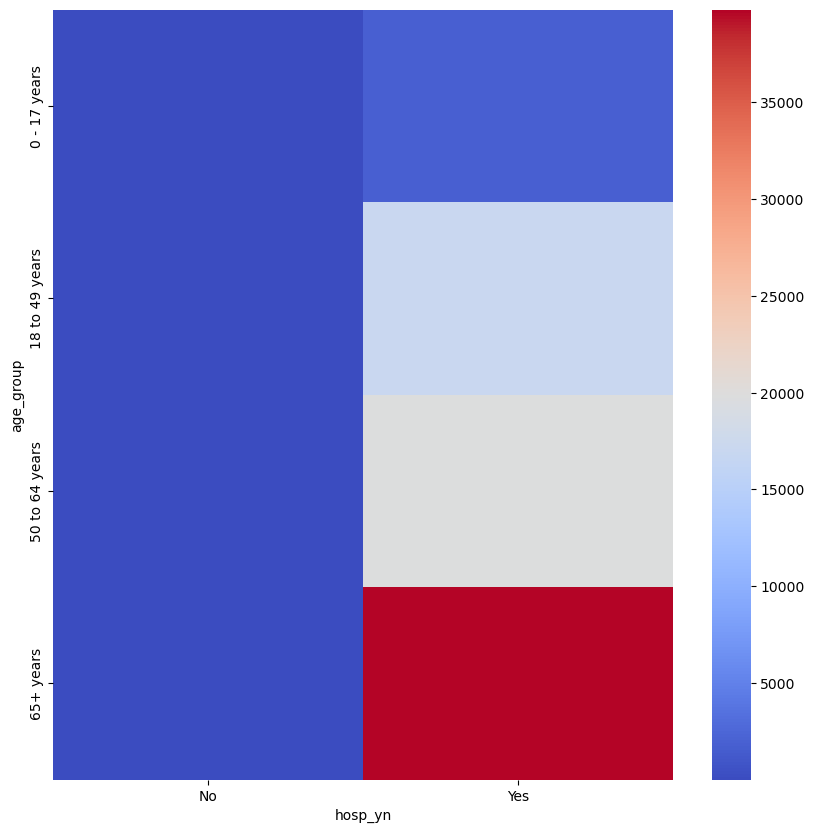

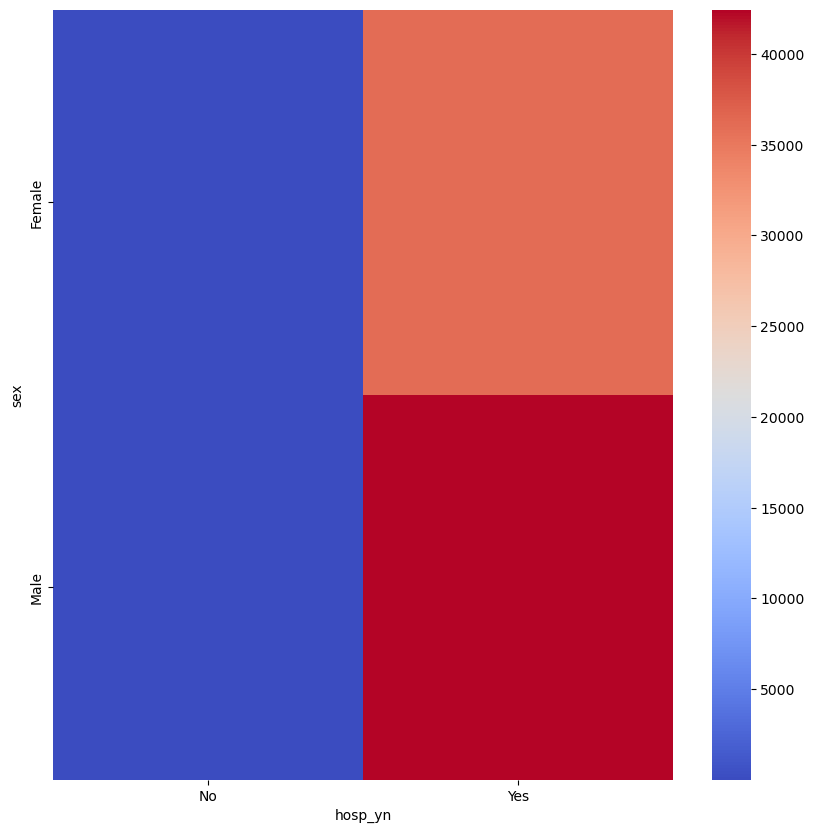

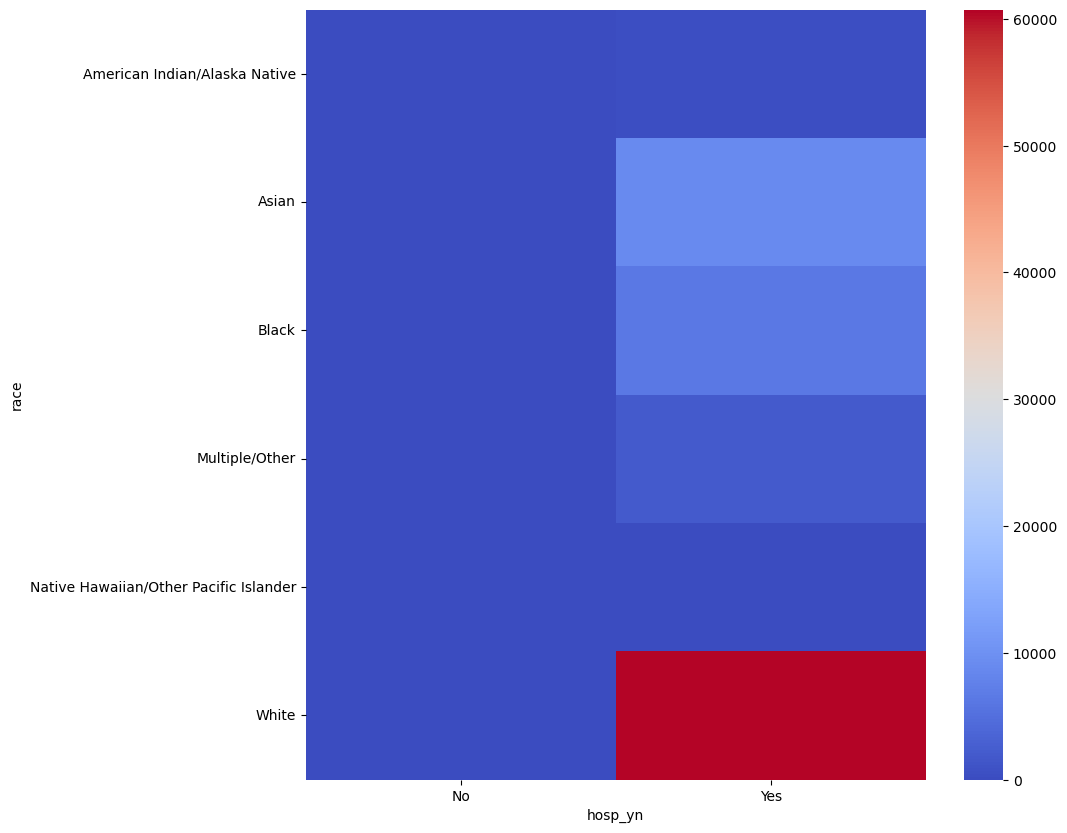

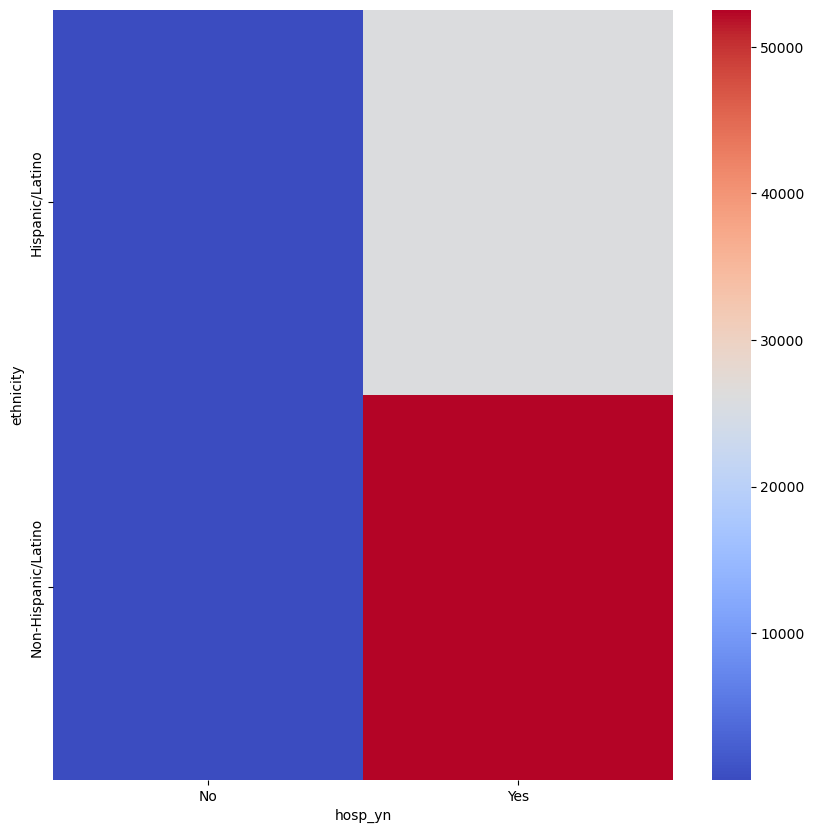

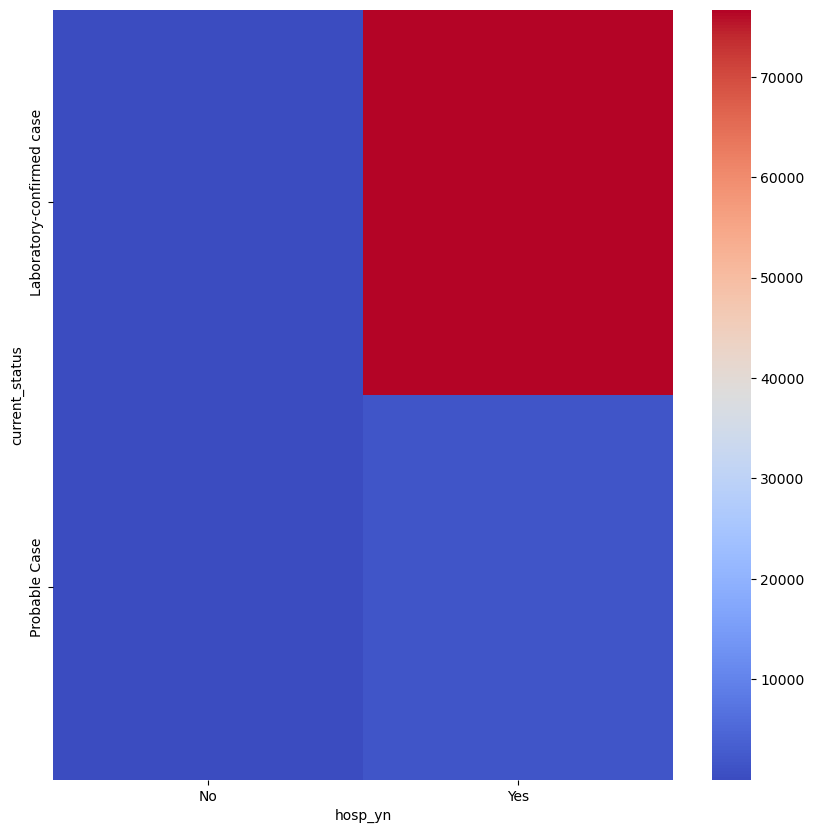

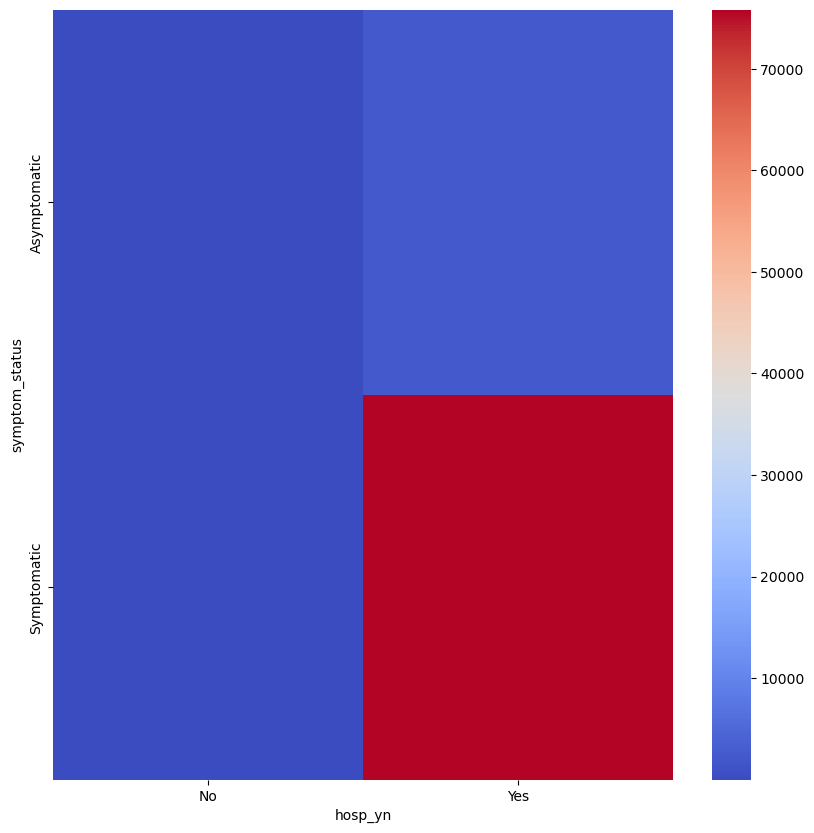

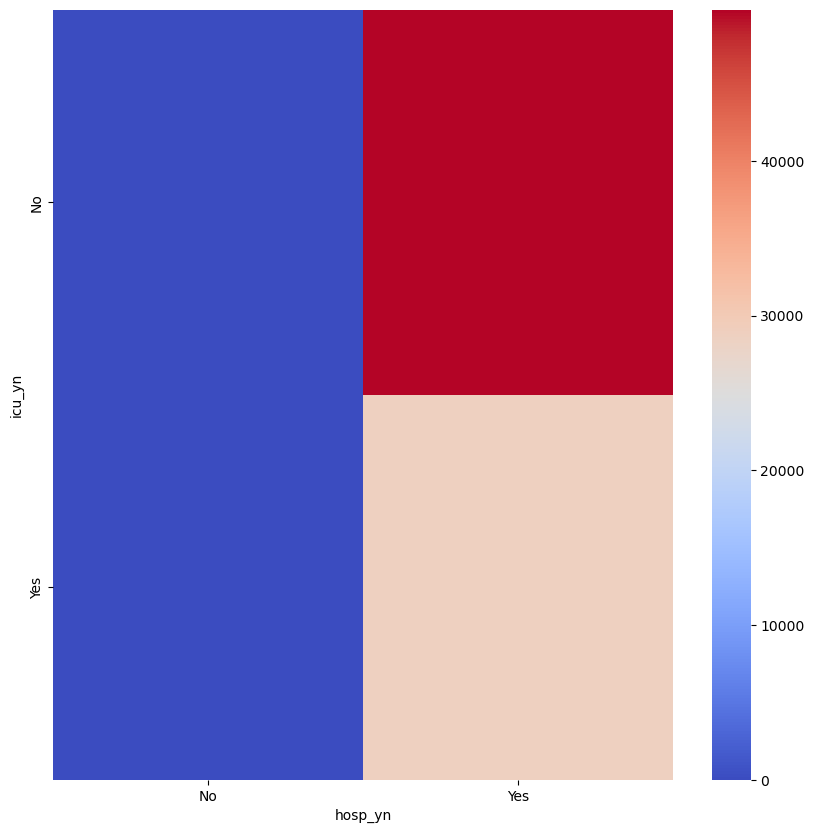

In [5]:
# Data Visualization - plot each parameter against the label
Y = df['hosp_yn']
X = df.drop(['hosp_yn'], axis = 1)

for param in X.columns:
    # Create heatmap for each of the parameters
    # Format for heatmap
    heatmapDat = pandas.crosstab(df[param], df['hosp_yn'])
    fig, ax = plt.subplots(figsize = (10,10))
    ax = sns.heatmap(heatmapDat, cmap = 'coolwarm')
    plt.savefig(f'{param}_plot.png', dpi = 300)


In [6]:
# Data pre-processing - One-Hot Encoding - Input
X_enc = pandas.get_dummies(X, columns = X.columns)
print(X_enc.columns)

# encode the Y label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y)
Y_enc = le.transform(Y)

# Combine X and Y - into dataframe for train-test split
df_processed = pandas.DataFrame(X_enc, columns = X_enc.columns)
df_processed['Hosp'] = Y_enc

print(df_processed.columns)

Index(['case_month_2020-03', 'case_month_2020-04', 'case_month_2020-05',
       'case_month_2020-06', 'case_month_2020-07', 'case_month_2020-08',
       'case_month_2020-09', 'case_month_2020-10', 'case_month_2020-11',
       'case_month_2020-12',
       ...
       'race_Native Hawaiian/Other Pacific Islander', 'race_White',
       'ethnicity_Hispanic/Latino', 'ethnicity_Non-Hispanic/Latino',
       'current_status_Laboratory-confirmed case',
       'current_status_Probable Case', 'symptom_status_Asymptomatic',
       'symptom_status_Symptomatic', 'icu_yn_No', 'icu_yn_Yes'],
      dtype='object', length=123)
Index(['case_month_2020-03', 'case_month_2020-04', 'case_month_2020-05',
       'case_month_2020-06', 'case_month_2020-07', 'case_month_2020-08',
       'case_month_2020-09', 'case_month_2020-10', 'case_month_2020-11',
       'case_month_2020-12',
       ...
       'race_White', 'ethnicity_Hispanic/Latino',
       'ethnicity_Non-Hispanic/Latino',
       'current_status_Laboratory-c

In [7]:
# Split Data into train test
x_train, x_test, y_train, y_test = train_test_split(X_enc, Y_enc, random_state = 42)

In [8]:
# SkLearn Naive Bayes Classifier Library
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score
clf = CategoricalNB()
model = clf.fit(x_train, y_train)
pred_y = model.predict(x_test)

# Compute F1 Score
print(f1_score(y_test, pred_y))


0.9996686969596574


In [ ]:
# save model to the pickle file
import pickle
with open 'categNB.pkl'